# 日経平均株価 日足

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

symbol = '^N225'
ticker = yf.Ticker(symbol)

df = ticker.history(period='6mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-24 00:00:00+09:00,39336.738281,39643.269531,39096.500000,39154.851562,110300000,0.0,0.0
2024-07-25 00:00:00+09:00,38524.199219,38557.789062,37825.578125,37869.511719,143000000,0.0,0.0
2024-07-26 00:00:00+09:00,37792.871094,38105.960938,37611.191406,37667.410156,124000000,0.0,0.0
2024-07-29 00:00:00+09:00,38139.121094,38719.699219,38010.011719,38468.628906,107300000,0.0,0.0
2024-07-30 00:00:00+09:00,38241.351562,38531.160156,38076.699219,38525.949219,109700000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-20 00:00:00+09:00,38671.769531,39032.929688,38671.769531,38902.500000,87500000,0.0,0.0
2025-01-21 00:00:00+09:00,39163.531250,39238.210938,38643.839844,39027.980469,93300000,0.0,0.0
2025-01-22 00:00:00+09:00,39355.218750,39694.570312,39332.628906,39646.250000,108500000,0.0,0.0


In [18]:
df0 = ticker.history(period='1y')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-24 00:00:00+09:00,36415.660156,36471.390625,36104.890625,36226.480469,108600000,0.0,0.0
2024-01-25 00:00:00+09:00,36213.140625,36312.359375,35912.539062,36236.468750,94600000,0.0,0.0
2024-01-26 00:00:00+09:00,36003.000000,36060.398438,35687.578125,35751.070312,109600000,0.0,0.0
2024-01-29 00:00:00+09:00,35814.289062,36186.871094,35813.769531,36026.941406,95500000,0.0,0.0
2024-01-30 00:00:00+09:00,36196.640625,36249.031250,36039.308594,36065.859375,87900000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-20 00:00:00+09:00,38671.769531,39032.929688,38671.769531,38902.500000,87500000,0.0,0.0
2025-01-21 00:00:00+09:00,39163.531250,39238.210938,38643.839844,39027.980469,93300000,0.0,0.0
2025-01-22 00:00:00+09:00,39355.218750,39694.570312,39332.628906,39646.250000,108500000,0.0,0.0


## 日足チャートと Bollinger's bands

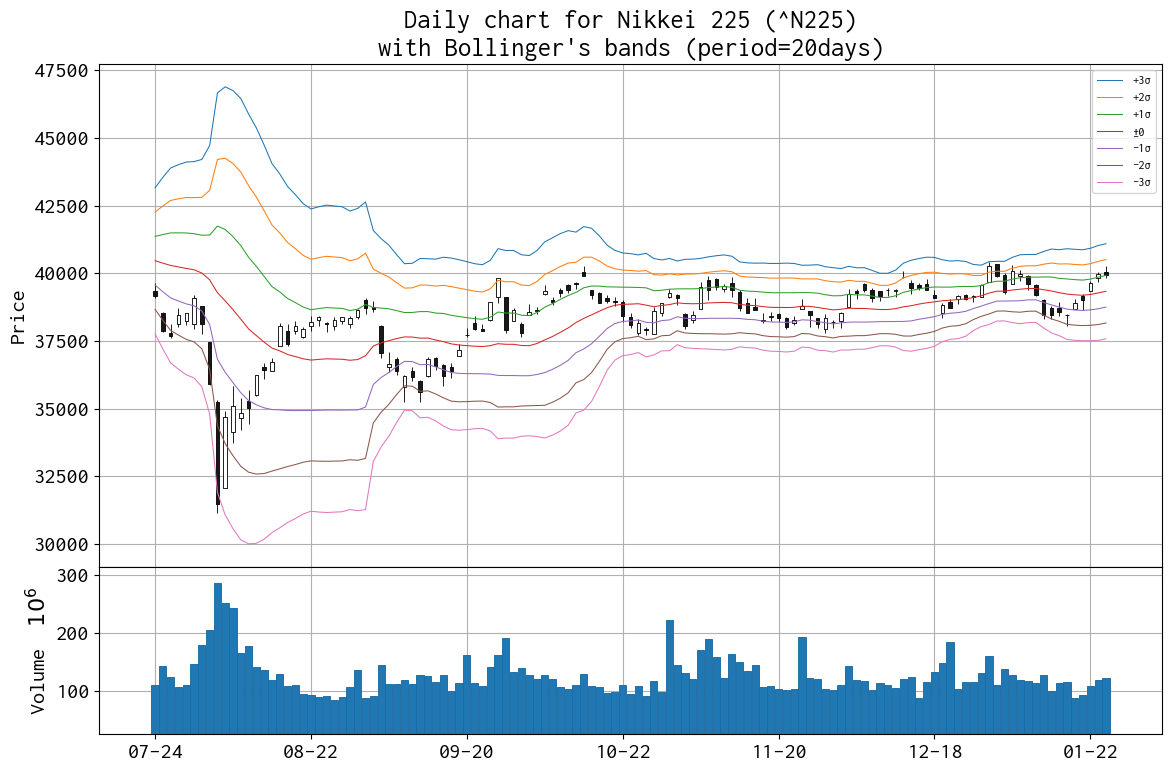

In [19]:
dict_psar = psar(df)

FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Bollinger bands
period = 20
r = df0['Close'].rolling(period)    
band_upper3 = r.mean() + 3 * r.std()
band_upper2 = r.mean() + 2 * r.std()
band_upper1 = r.mean() + 1 * r.std()
band_mean = r.mean()
band_lower1 = r.mean() - 1 * r.std()
band_lower2 = r.mean() - 2 * r.std()
band_lower3 = r.mean() - 3 * r.std()

apds  = [
    mpf.make_addplot(band_upper3[df.index], width=0.75, label='+3σ', ax=ax[0]),
    mpf.make_addplot(band_upper2[df.index], width=0.75, label='+2σ', ax=ax[0]),
    mpf.make_addplot(band_upper1[df.index], width=0.75, label='+1σ', ax=ax[0]),
    mpf.make_addplot(band_mean[df.index], width=0.75, label='±0', ax=ax[0]),
    mpf.make_addplot(band_lower1[df.index], width=0.75, label='-1σ', ax=ax[0]),
    mpf.make_addplot(band_lower2[df.index], width=0.75, label='-2σ', ax=ax[0]),
    mpf.make_addplot(band_lower3[df.index], width=0.75, label='-3σ', ax=ax[0]),
]   

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=ax[1],
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Daily chart for %s (%s)\nwith Bollinger\'s bands (period=20days)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Daily chart for %s\nwith Bollinger\'s bands (period=20days)' % symbol)

ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('daily_chart_bollinger_n225.png')
plt.show()

In [4]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-24 00:00:00+09:00,40060.488281,40279.789062,39806.691406,39931.980469,122600000,0.0,0.0


In [5]:
df.tail(2)['Close']

Date
2025-01-23 00:00:00+09:00    39958.871094
2025-01-24 00:00:00+09:00    39931.980469
Name: Close, dtype: float64

In [6]:
df.tail(2)['Close'].diff()

Date
2025-01-23 00:00:00+09:00          NaN
2025-01-24 00:00:00+09:00   -26.890625
Name: Close, dtype: float64

In [7]:
df['Close'].rolling(25).mean()

Date
2024-07-24 00:00:00+09:00             NaN
2024-07-25 00:00:00+09:00             NaN
2024-07-26 00:00:00+09:00             NaN
2024-07-29 00:00:00+09:00             NaN
2024-07-30 00:00:00+09:00             NaN
                                 ...     
2025-01-20 00:00:00+09:00    39262.538594
2025-01-21 00:00:00+09:00    39248.954688
2025-01-22 00:00:00+09:00    39259.915469
2025-01-23 00:00:00+09:00    39264.304688
2025-01-24 00:00:00+09:00    39282.766250
Name: Close, Length: 123, dtype: float64

In [8]:
df['Close'].rolling(75).mean()

Date
2024-07-24 00:00:00+09:00             NaN
2024-07-25 00:00:00+09:00             NaN
2024-07-26 00:00:00+09:00             NaN
2024-07-29 00:00:00+09:00             NaN
2024-07-30 00:00:00+09:00             NaN
                                 ...     
2025-01-20 00:00:00+09:00    38952.990417
2025-01-21 00:00:00+09:00    38942.302708
2025-01-22 00:00:00+09:00    38965.325365
2025-01-23 00:00:00+09:00    38982.750729
2025-01-24 00:00:00+09:00    39011.060312
Name: Close, Length: 123, dtype: float64